<a href="https://colab.research.google.com/github/envirodatascience/final-project-final_project_sydney_holly/blob/main/Sydney_Data_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import datetime
from plotnine import *
import plotnine


#Goals and Project Description

The goal of this data project is to visualize data on herbivores collected by camera traps in Botswana. The data was captured from 2/2021 through 8/2021, taking pictures and identifying the species of the animal in the photo. We merged two data sets: one on information about the camera traps themselves, such as longitude, latitude, and distance to roads or villages; and one with data on the photos taken over these months. Together, we can look at the quantity and diversity of species over time and space. We filtered the data to only herbivores, and looked at the relationship between time of day and species distribution, survey location and species diversity, and the distance to cattle posts (source of water) with cows as well as with wild species. Water is a vital resource to these animals in this dry climate, so there is often tension between humans trying to get their livestock water and wild animals looking to utilize the same resource. We predict that domestic animals will co-occur with humans, as humans are guiding their livestock and are more active during the day.

In [29]:
#import data, remove unused/empty columns

!git clone https://github.com/envirodatascience/final-project-final_project_sydney_holly.git

df_stations = pd.read_csv("https://raw.githubusercontent.com/envirodatascience/final-project-final_project_sydney_holly/main/stations_Feb2023.csv?token=GHSAT0AAAAAACBDBWVS5VN2DV74YMRQKAT2ZCG2ZSA")
df_stations.rename(columns={"Area":"Survey"},inplace=True)


df_photos = pd.read_excel("/content/final-project-final_project_sydney_holly/Holly_min20_Independent_feb2023.xlsx", sheet_name= "Holly_min20_Independent_feb2023")

print(df_photos.shape)


df_photos = df_photos.drop(columns=['Blank','Age','Sex','Minimum.Group.Size','Behaviour','Event.Groupsize','X.1'])


fatal: destination path 'final-project-final_project_sydney_holly' already exists and is not an empty directory.
(25833, 19)


In [30]:
#filter data: herbivores and people only

definite_herbivores = ['COW',"DONKEY","DUIKER","ELEPHANT",'GEMSBOK','GIRAFFE','KUDU','SCRUB HARE','SPRINGBOK','SPRINGHARE','STEENBOK','WILDEBEEST','ZEBRA']
unsure_herbivores = ['GUINEAFOWL','OSTRICH','BIRD','PORCUPINE','SPURFOWL FRANCOLIN','SUNDRY']
humans =  [x.upper() for x in ['Human on Donkey','Human on horse','vehicle','VEHICLES/HUMANS/LIVESTOCK','human on foot']]

herbivores = definite_herbivores + unsure_herbivores

subset = humans+herbivores

df_herbivores = df_photos[df_photos.Species.isin(subset)]

In [31]:
#merge dataframes, check columns

df_full = pd.merge(df_herbivores, df_stations, how="left", on= ["Deployment.Location.ID",'Season',"Survey"])

df_full['month'] = df_full['Date_Time.Captured'].dt.month
df_full['hour'] = df_full['Date_Time.Captured'].dt.hour

df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19632 entries, 0 to 19631
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Deployment.Location.ID  19632 non-null  object        
 1   X                       19632 non-null  int64         
 2   Date_Time.Captured      19632 non-null  datetime64[ns]
 3   Species                 19632 non-null  object        
 4   Project.ID              19632 non-null  object        
 5   Number.of.Animals       19632 non-null  int64         
 6   ID                      19632 non-null  object        
 7   Season                  19628 non-null  object        
 8   Survey                  19632 non-null  object        
 9   Event.ID                19632 non-null  object        
 10  Event.Duration          19632 non-null  int64         
 11  Event.Observations      19632 non-null  int64         
 12  Project                 19628 non-null  object

In [35]:
#make buckets for time of day

df_full["time_bucket"]= pd.cut(df_full.hour, 
   bins=[0,6,12,18,24], 
  labels=["dawn","afternoon","evening","night"])

df_full.sort_values(by="Project.ID",ascending=True)

,Deployment.Location.ID,X,Date_Time.Captured,Species,Project.ID,Number.of.Animals,ID,Season,Survey,Event.ID,...,Near_PA,Near_CP,NDVI,Cols,Near_Vil,Density,road_m,month,hour,time_bucket
0,Y0001,242,2022-02-09 05:38:00,DUIKER,Makgadikgadi,1,Makgadikgadi.North.B7,Wet,North,E1,...,17952.3528,2148.40,0.248473,#AA20B2,39066.360020,1.0,14547.6138,2,5,dawn
13091,Y6900,70872,2022-07-09 08:13:00,COW,Makgadikgadi,4,Boteti.South.D7,Dry,South,E17151,...,16090.1256,884.48,0.182606,#AA20B2,4762.356505,4.0,20189.9516,7,8,afternoon
13090,Y6900,70828,2022-07-08 11:19:00,COW,Makgadikgadi,1,Boteti.South.D7,Dry,South,E17150,...,16090.1256,884.48,0.182606,#AA20B2,4762.356505,4.0,20189.9516,7,11,afternoon
13089,Y6900,70732,2022-07-05 12:52:00,COW,Makgadikgadi,1,Boteti.South.D7,Dry,South,E17149,...,16090.1256,884.48,0.182606,#AA20B2,4762.356505,4.0,20189.9516,7,12,afternoon
13088,Y6900,70688,2022-07-05 06:09:00,COW,Makgadikgadi,1,Boteti.South.D7,Dry,South,E17148,...,16090.1256,884.48,0.182606,#AA20B2,4762.356505,4.0,20189.9516,7,6,dawn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6541,Y0037,97636,2022-04-25 13:31:00,COW,Makgadikgadi,1,Makgadikgadi.North.D10,Wet,North,E8591,...,159.7366,888.42,0.254936,#AA20B2,23252.236180,15.0,16697.8223,4,13,evening
6540,Y0037,97632,2022-04-25 12:58:00,COW,Makgadikgadi,1,Makgadikgadi.North.D10,Wet,North,E8590,...,159.7366,888.42,0.254936,#AA20B2,23252.236180,15.0,16697.8223,4,12,afternoon
6539,Y0037,97628,2022-04-25 10:57:00,BIRD,Makgadikgadi,1,Makgadikgadi.North.D10,Wet,North,E8589,...,159.7366,888.42,0.254936,#AA20B2,23252.236180,15.0,16697.8223,4,10,afternoon
6546,Y0037,97676,2022-04-27 13:42:00,DONKEY,Makgadikgadi,2,Makgadikgadi.North.D10,Wet,North,E8597,...,159.7366,888.42,0.254936,#AA20B2,23252.236180,15.0,16697.8223,4,13,evening


In [36]:
#bin species into categories of domestic, wild, or human

domestic_list = [x.upper() for x in['Cow','Donkey','Goat','Sheep','Horse']]

def label (row):
    if row['Species'] in domestic_list:
        return 'domestic'
    if row['Species'] in humans:
        return 'human'
    return 'wild'

df_full['Domestic'] = df_full.apply(lambda row: label(row), axis=1)

df_full = df_full.loc[df_full["Number.of.Animals"]>0]

#df_full[df_full.Species=="HUMAN ON FOOT"]

In [37]:
#aggregate data by number of animals per season per region per time of day per domestic status
#biodiversity: number of species, n_animals: number of individuals

df_agg =df_full.groupby(["time_bucket","Season","Domestic","Survey","GPSX","GPSY","Near_CP"]).agg(n_animals=("Number.of.Animals","sum"),biodiversity=("Species","count"),mean_animals=("Number.of.Animals","mean")).reset_index()

df_agg = df_agg.loc[df_agg.n_animals>0]
df_herbs_only = df_agg.loc[(df_agg.Domestic != "human")]

df_agg.sort_values(by="biodiversity",ascending=False)


,time_bucket,Season,Domestic,Survey,GPSX,GPSY,Near_CP,n_animals,biodiversity,mean_animals
13089268,evening,Dry,domestic,South,24.223037,-21.185706,4084.85,518,342,1.514620
16161268,evening,Wet,domestic,South,24.223037,-21.185706,4084.85,415,274,1.514599
14113268,evening,Dry,human,South,24.223037,-21.185706,4084.85,551,266,2.071429
13412495,evening,Dry,human,North,24.070648,-20.772271,1110.96,541,244,2.217213
15836968,evening,Wet,domestic,North,24.367389,-20.822435,888.42,329,238,1.382353
...,...,...,...,...,...,...,...,...,...,...
14054447,evening,Dry,human,South,24.186262,-21.333894,2755.53,4,1,4.000000
14011999,evening,Dry,human,South,24.151495,-21.104579,6526.53,2,1,2.000000
13804105,evening,Dry,human,North,24.370897,-20.691870,1806.09,2,1,2.000000
13590403,evening,Dry,human,North,24.219917,-20.827400,581.91,1,1,1.000000


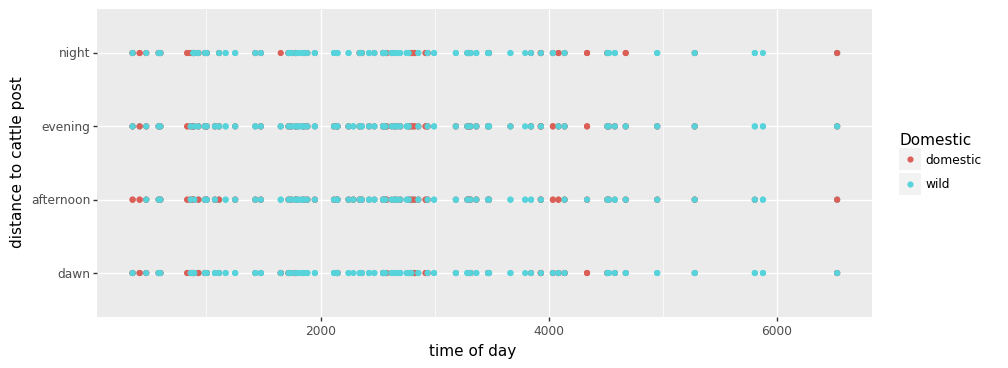

<ggplot: (8744275009681)>

In [13]:
a = ( ggplot(df_herbs_only,aes(y="time_bucket",x="Near_CP",color="Domestic"))
     +geom_point()
     +xlab("time of day")
     +ylab("distance to cattle post")
     +theme(figure_size=(10, 4))   
)
a

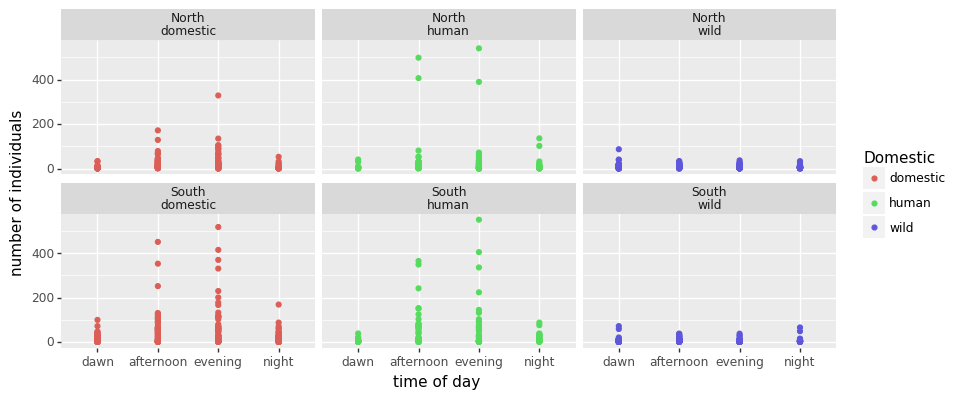

<ggplot: (8773926380746)>

In [11]:
#plot number of individuals from each category at different times for the two regions

g =( ggplot(df_agg,aes(x="time_bucket",y="n_animals",color="Domestic"))
     +geom_point()
     +xlab("time of day")
     +ylab("number of individuals")
     +theme(figure_size=(10, 4))
     +facet_wrap(["Survey","Domestic"])      
)
g

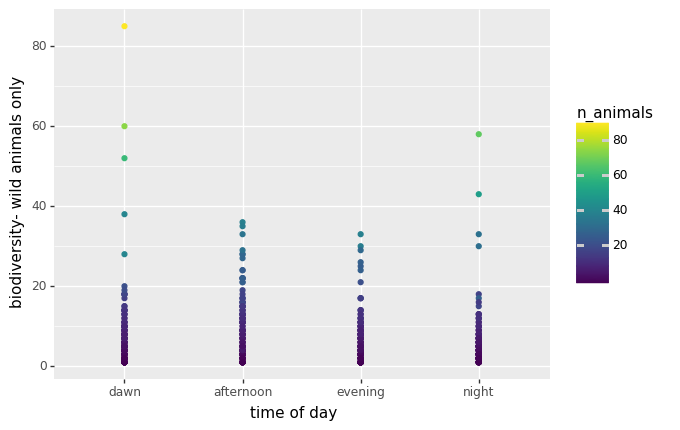

<ggplot: (8744273658727)>

In [14]:
#plot of biodiversity and species density of wild animals throughout the day

g =( ggplot(df_agg.loc[df_agg.Domestic=="wild"],aes(x="time_bucket",y="biodiversity",color="n_animals"))
     +geom_point() 
     +xlab("time of day")
     +ylab("biodiversity- wild animals only")
)
g

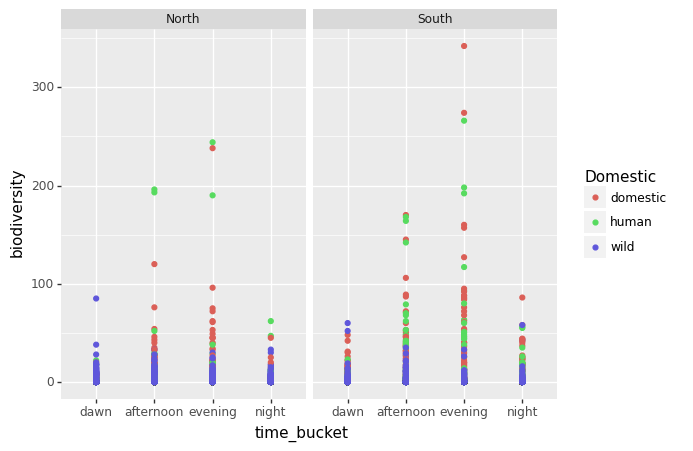

<ggplot: (8773864814349)>

In [15]:
p = (ggplot(df_agg, aes(x="time_bucket", y="biodiversity", color="Domestic"))
  +geom_point()
  +facet_wrap("Survey")
)
p

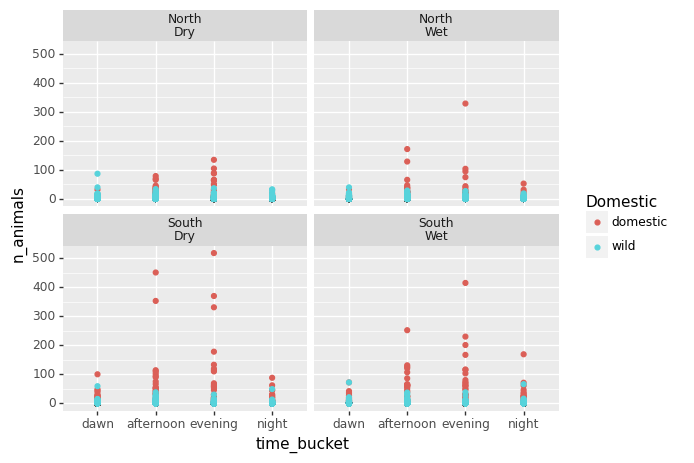

<ggplot: (8730313524824)>

In [ ]:
p2 = (ggplot(df_herbs_only, aes(x="time_bucket",y="n_animals", color="Domestic"))
  +geom_point()
  +facet_wrap(["Survey","Season"])
)
p2

/usr/local/lib/python3.9/dist-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


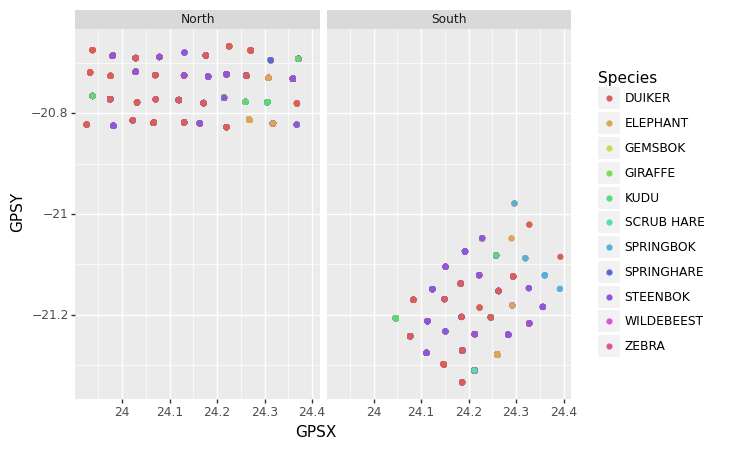

<ggplot: (8744272782842)>

In [16]:
#make dataframe of just wild animals

df_wildlife = df_full.loc[(df_full.Domestic =="wild")]

df_wildlife= df_wildlife.loc[df_wildlife["Number.of.Animals"]>0]



In [17]:
#aggregate wild animals: count number of species and sum individuals

wild_agg = df_wildlife.groupby(["Near_Vil","Near_river","time_bucket","Treatment","Season","Near_CP","Survey"]).agg(n_animals=("Number.of.Animals","sum"),biodiversity=("Species","count")).reset_index()
wild_agg = wild_agg[wild_agg.n_animals>0]


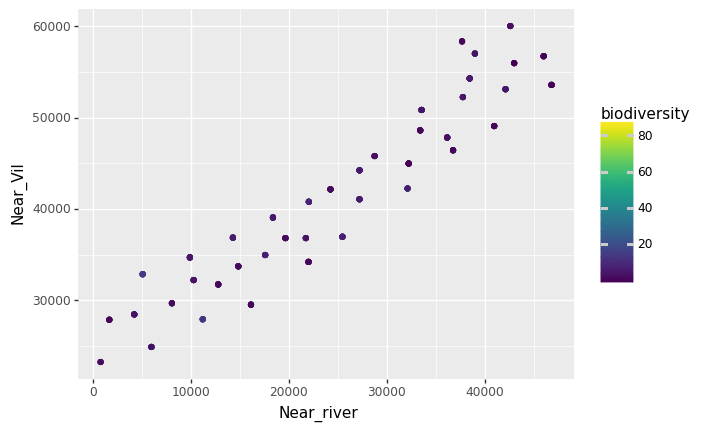

<ggplot: (8744273704491)>

In [18]:
#plot wild animals between villages and rivers

c = (ggplot(wild_agg.loc[wild_agg.Survey=="North"], aes(x="Near_river",y="Near_Vil", color="biodiversity"))
  +geom_point()
)
c

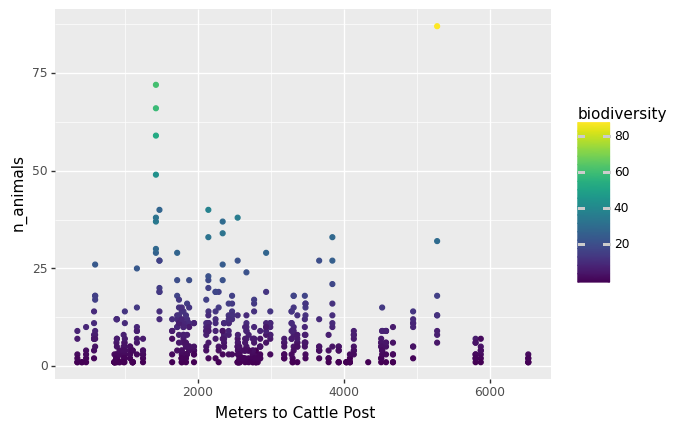

<ggplot: (8773865026259)>

In [24]:
cp_wild = (ggplot(wild_agg, aes(x="Near_CP",y="n_animals"))
  +geom_point(aes(color="biodiversity"))
  +xlab("Meters to Cattle Post")
)

cp_wild

In [ ]:
north_wildlife = df_wildlife.loc[df_wildlife.Survey=="North"]
south_wildlife = df_wildlife.loc[df_wildlife.Survey=="South"]

north_wild_agg = north_wildlife.groupby(["Species","Near_Vil","Near_river","time_bucket","month"]).agg(biodiversity=("Species","count"),n_animals=("Number.of.Animals","sum")).reset_index()

south_wild_agg = south_wildlife.groupby(["Species","Near_Vil","Near_river","time_bucket","month"]).agg(biodiversity=("Species","count"),n_animals=("Number.of.Animals","sum")).reset_index()



In [26]:
df_north = df_full.loc[df_full.Survey=="North"]

df_south = df_full.loc[df_full.Survey=="South"]

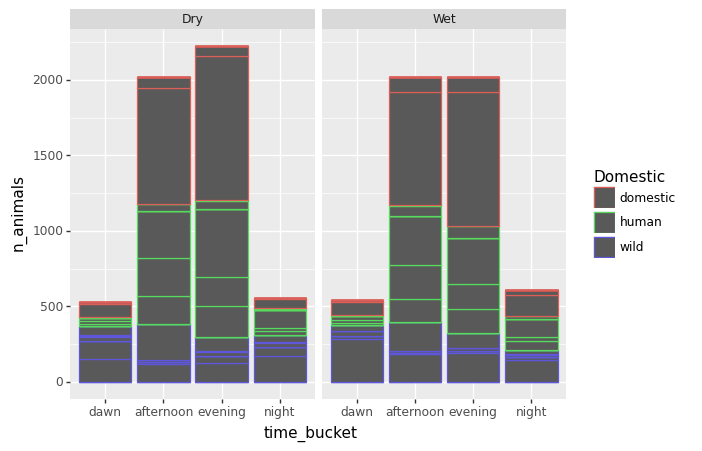

<ggplot: (8768958825828)>

In [ ]:
df_north_agg = df_north.groupby(["Species","time_bucket","Season","Domestic","Survey"]).agg(n_animals=("Number.of.Animals","sum"),biodiversity=("Species","count")).reset_index()

a = (ggplot(df_north_agg, aes(x="time_bucket",y="n_animals", color="Domestic"))
  +geom_bar(position="stack", stat="identity")
  +facet_wrap("Season")
)
a

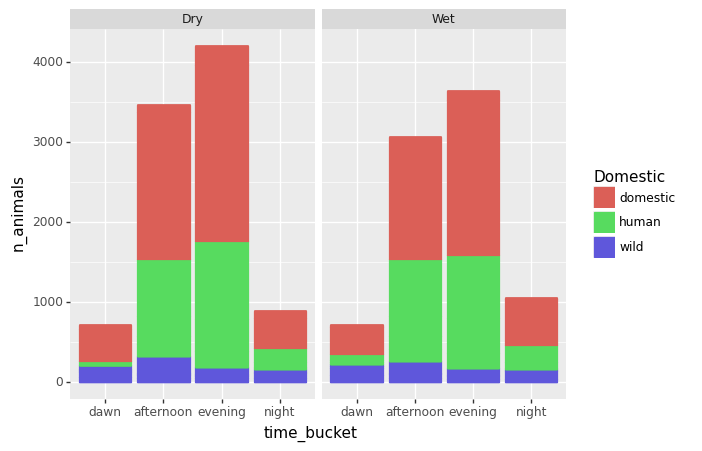

<ggplot: (8773864898277)>

In [27]:
df_south_agg = df_south.groupby(["Species","time_bucket","Season","Domestic"]).agg(n_animals=("Number.of.Animals","sum"),biodiversity=("Species","count")).reset_index()

b = (ggplot(df_south_agg, aes(x="time_bucket",y="n_animals", color="Domestic",fill="Domestic"))
  +geom_bar(position="stack", stat="identity")
  +facet_wrap("Season")
)
b

In [24]:
df_cow = df_full.loc[df_full.Species=="COW"]

north_cow = df_cow.loc[df_cow.Survey=="North"]
south_cow = df_cow.loc[df_cow.Survey=="South"]

north_cow_agg = north_cow.groupby(["ID","Season","month","Species","Near_Vil","Near_river","road_m","Domestic","Near_CP","Survey"]).agg(n_cows=("Number.of.Animals","sum")).reset_index()
south_cow_agg = south_cow.groupby(["ID","Season","month","Species","Near_Vil","Near_river","road_m","Domestic","Near_CP","Survey"]).agg(n_cows=("Number.of.Animals","sum")).reset_index()

cow_agg = pd.merge(north_cow_agg, south_cow_agg, how="outer")

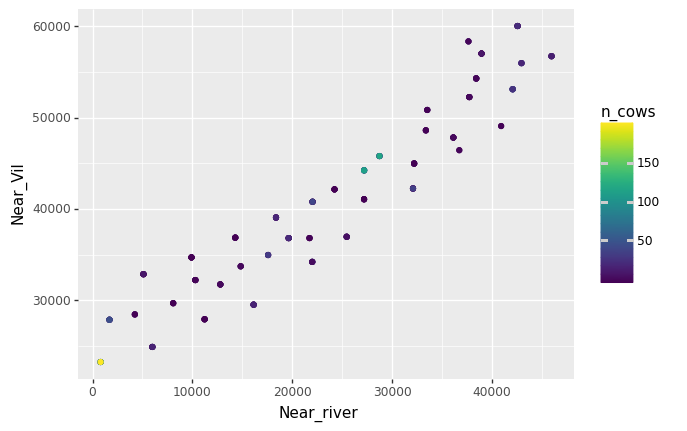

<ggplot: (8773866123057)>

In [31]:
c = (ggplot(north_cow_agg, aes(x="Near_river",y="Near_Vil", color="n_cows"))
  +geom_point()
)
c

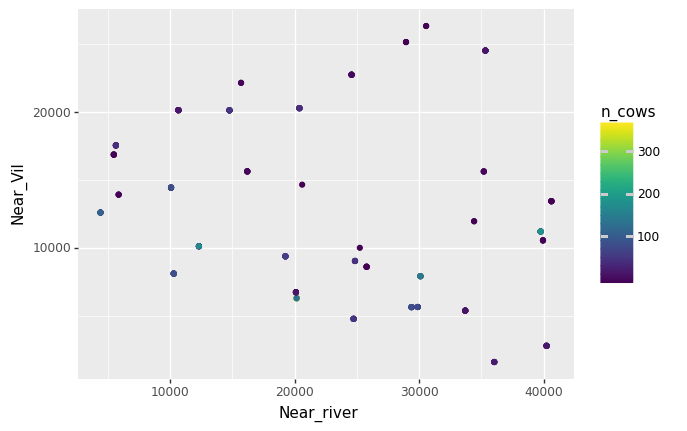

<ggplot: (8773860788589)>

In [32]:
d = (ggplot(south_cow_agg, aes(x="Near_river",y="Near_Vil", color="n_cows"))
  +geom_point()
)
d

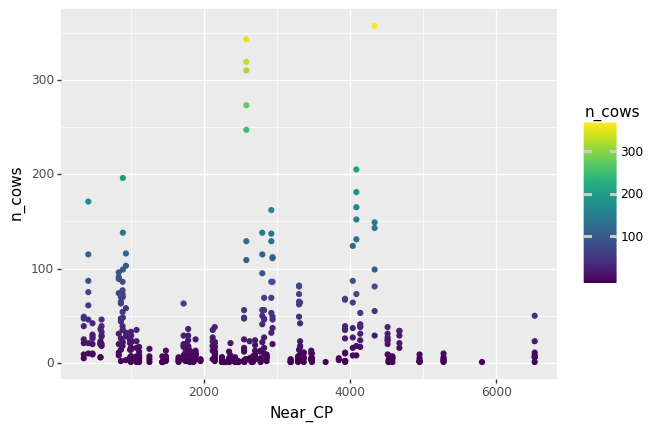

<ggplot: (8744273572621)>

In [26]:
e = (ggplot(cow_agg, aes(x="Near_CP",y="n_cows", color="n_cows"))
  +geom_point()
)
e

# Findings and Next Steps

The main abstract finding of this project is that real data does not always have an easy and obvious narrative, with drastic correlations and extreme trends. This is a data set of thousands of observations of animals that happen to pass by, and there is no explicit problem we were trying to solve. But even so, we were able to discover the general trends of animal movement without ever visiting the study site.

This landscape is dominated by domestic animals and humans. The wild animals are much fewer in number and diversity. This is largely attributed to the overwhelming quantity of cows in this region, as would be expected by the lifestyle and economy of central Botswana.

Separating the data into the North and South regions and the Wet and Dry seasons illuminated trends in herbivore behavior (plot g). Humans tend to be most active during the day, as are the domestic animals. The parallel between domestic animal presence and human presence is consistent with what we would expect, as both cows and humans are diurnal and many of the humans are likely herding or monitoring their cattle. Wild animals tend to be most active in the early morning or at night. This could be due to a concentration of nocturnal animals, or perhaps the humans and domestic animals crowd out the region during the day.

I was very excited to see a linear correlation of cattle distribution between distance to road and distance to rivers (Plot C). This was only apparent in the Northern site, suggesting cattle take a linear path away from the villages and rivers. However, this plot is misleading. The "correlation" is identical to that of wild animals, because the locations are merely a reflection of the placement of the camera traps. Additionally, the lack of linearity in the southern region is likely due to there being fewer rivers in the south. These plots taught me a lesson that data can often be too good to be true, and there are underlying variables that explain away any easy sources of causation. I included these plots in this document and the presentation to highlight how data can be misleading.

This data can be used to make recommendations for future cattle post locations. In the last plot, there is a spike in number of cattle over 4000 meters from the nearest cattle post. Perhaps 4 km is not a concern for cattle, but given that the maximum of the range is 6 km, I imagine that 4k is pushing it. The plot of wild animals and distance to cattle posts is very similar to that of cows, suggesting that they either use the same range or are utilizing cattle posts at a similar frequency.

In the future, I would like to explore the abundance of trees or plants around these camera traps and see if there is any relationship with "greenness" and herbivore presence. This is also likely to change given the season, as well as the site. 